In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dus14 = pd.read_csv("DUS2014.csv")
dus18 = pd.read_csv("DUS2018.csv")

In [18]:
d14s = dus14 [["lytis" , "amzius" , "issilavinimas" , "bdu_spalio" , "profesija"]] #susikuriam mazesne lentele
d14s.head(5)

,lytis,amzius,issilavinimas,bdu_spalio,profesija
0,M,20-29,G4,6.00,261
1,F,20-29,G2,6.00,334
2,F,40-49,G4,6.00,221
3,F,30-39,G4,6.00,332
4,M,40-49,G2,11.33,962


In [19]:
d18s = dus18 [["lytis" , "amzius" , "issilavinimas" , "bdu_spalio" , "profesija"]]

In [20]:
# suraskite ir išspausdinkite vidutinius vyrų bei moterų atlyginimus (spalio)
# 2014 ir 2018 metams.


vyru14 = d14s[d14s["lytis"]=="M"]  
vyruvid14 = vyru14["bdu_spalio"].mean()
mot14 = d14s[d14s["lytis"]=="F"]  
moteruvid14 = mot14["bdu_spalio"].mean()

print("2014 vyru:" , vyruvid14/3.4528 ,"," ,  "2014 moteru:" ,moteruvid14/3.4528 )        #nes Litai

vyru18 = d18s[d18s["lytis"]=="M"]  
vyruvid18 = vyru18["bdu_spalio"].mean()
mot18 = d18s[d18s["lytis"]=="F"]  
moteruvid18 = mot18["bdu_spalio"].mean()

print("2018 vyru:" , vyruvid18 ,"," ,  "2018 moteru:" ,moteruvid18 )


2014 vyru: 762.7704309291468 , 2014 moteru: 607.4431355450901
2018 vyru: 1014.4962626801922 , 2018 moteru: 832.1469450889405


In [22]:
vyruvid = d14s[d14s["lytis"]=="M"]["bdu_spalio"].mean()/3.4528
vyruvid

762.7704309291468

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
bdu_spalio = d14s["bdu_spalio"].values
bdu_eurais = bdu_spalio/3.4528
d14s["bdu€"] = bdu_eurais
d14s.head(10)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
7,F,20-29,G2,13.33,531,3.860635
8,M,20-29,G1,6.67,912,1.931766
9,M,40-49,G2,6.00,332,1.737720


In [31]:
d14s["bdu€"] = d14s["bdu_spalio"]/3.4528
d14s.head(10)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,bdu1€
0,M,20-29,G4,6.00,261,1.737720,1.737720
1,F,20-29,G2,6.00,334,1.737720,1.737720
2,F,40-49,G4,6.00,221,1.737720,1.737720
3,F,30-39,G4,6.00,332,1.737720,1.737720
4,M,40-49,G2,11.33,962,3.281395,3.281395
5,M,30-39,G2,6.00,122,1.737720,1.737720
6,M,60+,G4,6.00,221,1.737720,1.737720
7,F,20-29,G2,13.33,531,3.860635,3.860635
8,M,20-29,G1,6.67,912,1.931766,1.931766
9,M,40-49,G2,6.00,332,1.737720,1.737720


In [26]:
# .query()

d14s.query('lytis =="M"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
8,M,20-29,G1,6.67,912,1.931766
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2273.421571
44927,M,30-39,G4,1793.00,231,519.288693
44931,M,50-59,G4,3246.00,232,940.106580
44934,M,60+,G4,3819.67,231,1106.252896


In [27]:
d14s.query("lytis =='M' and issilavinimas =='G3'")

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
11,M,20-29,G3,9.67,315,2.800626
18,M,60+,G3,6.00,312,1.737720
19,M,20-29,G3,6.00,333,1.737720
21,M,20-29,G3,28.67,241,8.303406
25,M,50-59,G3,6.00,261,1.737720
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1067.249768
44808,M,60+,G3,2692.00,235,779.657090
44843,M,20-29,G3,1625.00,235,470.632530
44914,M,40-49,G3,3444.33,234,997.546918


In [30]:
edu = input("Iveskite issilavinima koda(G1, G2 , G3 , G4)")
ats = d14s.query("issilavinimas == @edu")             #  @ pries tai esanciame kode!!!!!!!!!!!!!!!!!!!!  
ats.head(3)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
1,F,20-29,G2,6.00,334,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720


In [70]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']

# g1_issilavinimas = d14s.query("issilavinimas == 'G1'")
for kodas in edus:
    vidurkis = d14s.query("issilavinimas ==@kodas")["bdu€"].mean()
    print(kodas, vidurkis)

G1 474.7446499958954
G2 543.8925813045148
G3 730.4106784275447
G4 1011.9653972982893


In [37]:
def ltlToEuro(litas):
    euras = litas / 3.4528
    return euras

d14s["Eurai is funkcijos"] = d14s["bdu_spalio"].apply(ltlToEuro)                #d14s["Eurai is funkcijos"] = "taip idedam i funkcija"


In [38]:
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Eurai is funkcijos
0,M,20-29,G4,6.00,261,1.737720,1.737720
1,F,20-29,G2,6.00,334,1.737720,1.737720
2,F,40-49,G4,6.00,221,1.737720,1.737720
3,F,30-39,G4,6.00,332,1.737720,1.737720
4,M,40-49,G2,11.33,962,3.281395,3.281395
5,M,30-39,G2,6.00,122,1.737720,1.737720


In [45]:
# parašykite kodą, kuris pridėtų naują stulpelį prie d14s lentelės
#  kur būtų tokie žodžiai:
# Vyras, jei stulpelyje lytis buvo M raidė
# Moteris, jei stulpelyje lytis buvo F raidė



def LTlytis(lytis):
    if lytis == "M":
        return "Vyras"
    else:
        return "Moteris"

d14s["Lytis Lietuviskai"] = d14s["lytis"].apply(LTlytis)  
d14s.head(6)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Eurai is funkcijos,Lytis Lietuviskai
0,M,20-29,G4,6.00,261,1.737720,1.737720,Vyras
1,F,20-29,G2,6.00,334,1.737720,1.737720,Moteris
2,F,40-49,G4,6.00,221,1.737720,1.737720,Moteris
3,F,30-39,G4,6.00,332,1.737720,1.737720,Moteris
4,M,40-49,G2,11.33,962,3.281395,3.281395,Vyras
5,M,30-39,G2,6.00,122,1.737720,1.737720,Vyras


In [32]:
#alternatyvus sprendimas: 
def zodzioKeitimas():
    lytys = []
    for x in dus14['lytis'].values:
        if x == 'M':
            lytys.append('Vyras')
        else:
            lytys.append('Moteris')
    return lytys
zodzioKeitimas()
d14s['Vyrai ir Moterys'] = zodzioKeitimas()
d14s.head(15)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,bdu1€,Vyrai ir Moterys
0,M,20-29,G4,6.00,261,1.737720,1.737720,Vyras
1,F,20-29,G2,6.00,334,1.737720,1.737720,Moteris
2,F,40-49,G4,6.00,221,1.737720,1.737720,Moteris
3,F,30-39,G4,6.00,332,1.737720,1.737720,Moteris
4,M,40-49,G2,11.33,962,3.281395,3.281395,Vyras
5,M,30-39,G2,6.00,122,1.737720,1.737720,Vyras
6,M,60+,G4,6.00,221,1.737720,1.737720,Vyras
7,F,20-29,G2,13.33,531,3.860635,3.860635,Moteris
8,M,20-29,G1,6.67,912,1.931766,1.931766,Vyras
9,M,40-49,G2,6.00,332,1.737720,1.737720,Vyras


In [47]:
d14s.drop(columns=["Eurai is funkcijos"], inplace = True)        #istrinti stulpeli
d14s.head()

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Lytis Lietuviskai
0,M,20-29,G4,6.00,261,1.737720,Vyras
1,F,20-29,G2,6.00,334,1.737720,Moteris
2,F,40-49,G4,6.00,221,1.737720,Moteris
3,F,30-39,G4,6.00,332,1.737720,Moteris
4,M,40-49,G2,11.33,962,3.281395,Vyras


In [52]:
nypd = pd.read_csv("NYPD_Shooting.csv" ,sep=";" , parse_dates = ["OCCUR_DATE" , "OCCUR_TIME"])
nypd.head(2)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [53]:
nypd = pd.read_csv("NYPD_Shooting.csv" ,sep=";" , parse_dates = {"DATA":["OCCUR_DATE" , "OCCUR_TIME"]})
nypd.head(3)

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480


In [55]:
# .dt modulis ,veikia tik tada ,jei stulpelis DataFrame yra date time tipo 

nypd_small = nypd[["DATA" , "BORO", 'STATISTICAL_MURDER_FLAG']]
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2019-08-23 22:10:00,QUEENS,False
1,2019-11-27 15:54:00,BRONX,False
2,2019-02-02 19:40:00,MANHATTAN,False
3,2019-10-24 00:52:00,STATEN ISLAND,True
4,2019-08-22 18:03:00,BRONX,False


In [56]:
nypd_small ["DATA"].dt.month

0         8
1        11
2         2
3        10
4         8
         ..
21621    11
21622    12
21623     7
21624     9
21625     4
Name: DATA, Length: 21626, dtype: int32

In [57]:
nypd_small ["MonthNumber"] = nypd_small["DATA"].dt.month
nypd_small ["Hour"] = nypd_small.
nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber
0,2019-08-23 22:10:00,QUEENS,False,8
1,2019-11-27 15:54:00,BRONX,False,11
2,2019-02-02 19:40:00,MANHATTAN,False,2


In [58]:
nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour
nypd_small['MthName'] = nypd_small['DATA'].dt.month_name()
nypd_small.head(3)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,MonthNr,Hour,HR,MthName
0,2019-08-23 22:10:00,QUEENS,False,8,8,22,22,August
1,2019-11-27 15:54:00,BRONX,False,11,11,15,16,November
2,2019-02-02 19:40:00,MANHATTAN,False,2,2,19,20,February


In [66]:
# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr


def Parosmetas(Hour):
    if 12 <= Hour < 18:
        return "Diena"
    elif  6 <= Hour < 12:
        return "Rytas "
    else: 
        return "Naktis"

nypd_small['Paros laikas'] = nypd_small["Hour"].apply(Parosmetas)  
nypd_small.head(6)

#kita

def MetuLaikas(x):
    if x>= 12 or x <=2:                                   #galima ir     if x in [12,1,2]:
        return "Ziema"
    elif x >= 3 and x <=5:
        return "Pavasaris "    
    elif x >= 6 and x <=8:
        return "Vasara "   
    else:
        return "Ruduo"  

nypd_small['Metu laikas'] = nypd_small["MonthNr"].apply(MetuLaikas)  
nypd_small.head(6)




,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,MonthNr,Hour,HR,MthName,Paros laikas,Matu laikas,Metu laikas
0,2019-08-23 22:10:00,QUEENS,False,8,8,22,22,August,Naktis,Vasara,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,11,15,16,November,Diena,Ruduo,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,2,19,20,February,Naktis,Ziema,Ziema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,10,0,1,October,Naktis,Ruduo,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,8,18,18,August,Naktis,Vasara,Vasara
5,2019-06-07 17:50:00,BROOKLYN,False,6,6,17,18,June,Diena,Vasara,Vasara


In [67]:
nypd_small.drop(columns=["Matu laikas"], inplace = True)        #istrinti stulpeli
nypd_small.head()

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNumber,MonthNr,Hour,HR,MthName,Paros laikas,Metu laikas
0,2019-08-23 22:10:00,QUEENS,False,8,8,22,22,August,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,11,15,16,November,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,2,19,20,February,Naktis,Ziema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,10,0,1,October,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,8,18,18,August,Naktis,Vasara


In [71]:
nypd_small["MthName"].value_counts().sort_values(ascending=False)                  #suskaiciuoja visus iraso pasirinkimus
                                                        # MTH Name siuo atveju index, o skaiciai Value

MthName
July         2482
August       2462
June         2192
May          2037
September    2033
October      1851
December     1601
April        1578
November     1550
January      1411
March        1331
February     1098
Name: count, dtype: int64

In [72]:
nypd_small["MthName"].value_counts().sort_values(ascending=True)      #filtras is eiles nuo maziausios value

MthName
February     1098
March        1331
January      1411
November     1550
April        1578
December     1601
October      1851
September    2033
May          2037
June         2192
August       2462
July         2482
Name: count, dtype: int64

In [73]:
nypd_small["MthName"].value_counts().sort_index(ascending=True)            #filtras is eiles nuo maziausio index

MthName
April        1578
August       2462
December     1601
February     1098
January      1411
July         2482
June         2192
March        1331
May          2037
November     1550
October      1851
September    2033
Name: count, dtype: int64

In [74]:
shootings = nypd_small["MthName"].value_counts()
months = shootings.index
counts = shootings.values
print(months, counts , sep="\n")

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


In [75]:
nypd_small["MonthNr"].value_counts().sort_index(ascending=True)

MonthNr
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

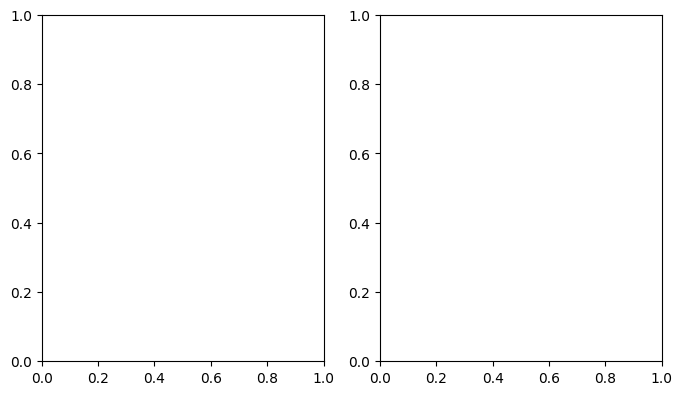

In [80]:
#plt.subplots():
langas , grafikas = plt.subplots(1,2, figsize=[8,4.5])          # plt.subplotsx(y,x) = x viena eiltue, y= stulpelis

plt.show()

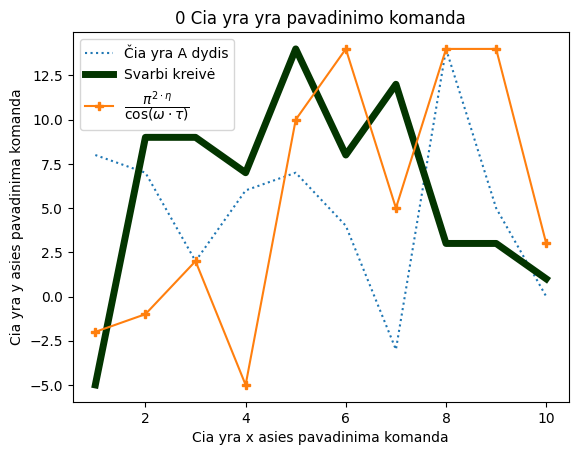

In [101]:
a = np.arange(1,11)
b= np.random.randint (-5,15,10)   
c = np.random.randint (-5,15,10)
d = np.random.randint (-5,15,10)

#plot() metodas
grafikas.plot(a,b, label="Čia yra A dydis" , linestyle = ":")
grafikas.plot(a,c, label="Svarbi kreivė" , linewidth = "5", color = "xkcd:dark green")
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$' , marker="P")    #marker duomenu taskai

grafikas.set_xlabel("Cia yra x asies pavadinima komanda")
grafikas.set_ylabel("Cia yra y asies pavadinima komanda")
grafikas.set_title("0 Cia yra yra pavadinimo komanda")

grafikas.legend(loc='best' )         #loc=[1,1] ,'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

plt.show()

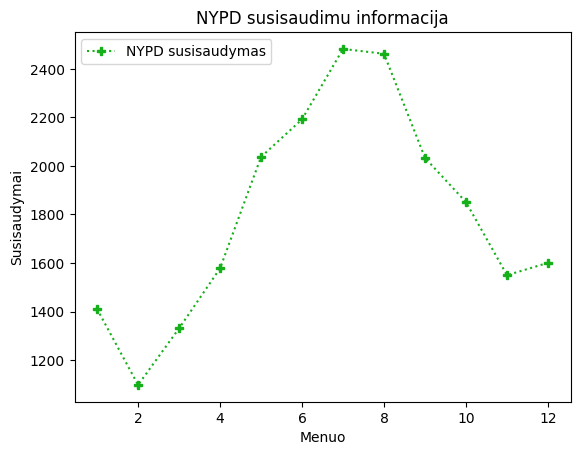

MonthNr
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

In [124]:
# turite nypd susišaudymų duomenis.
# nubraižykite vizualizaciją, naudodami ką tik pateiktą pavyzdį, 
# kad matytumėme, kurį monėsį yra daugiausiai, mažiausiai užfiksduotų
# susišaudymų
# sudėkite prasmingus ašių pavadinimus
# 
months = nypd_small["MonthNr"].value_counts().sort_index(ascending=True).index
shootings = nypd_small["MonthNr"].value_counts().sort_index(ascending=True).values

langas , grafikas = plt.subplots()

grafikas.plot(months , shootings  , label= "NYPD susisaudymas" , linestyle = ":" ,marker="P", color = "xkcd:green")

grafikas.set_xlabel("Menuo")
grafikas.set_ylabel("Susisaudymai")
grafikas.set_title("NYPD susisaudimu informacija")

grafikas.legend(loc='best' )
plt.show()j

nypd_small["MonthNr"].value_counts().sort_index(ascending=True)

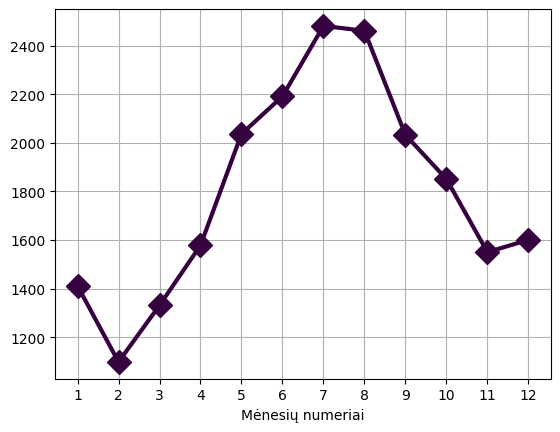

In [140]:
monts_counts = nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
months = monts_counts.index
counts = monts_counts.values

fig, ax = plt.subplots()
ax.plot(months, counts, lw=3, c='xkcd:deep purple', marker='D', ms=12)

ax.set_xticks(months) #x ašies norimų skaičių palikimas
# ax.set_xlim(-5, 15) #x ašies ribų keitimas
ax.grid() #tinklelio uždėjimas
ax.set_xlabel('Mėnesių numeriai')

plt.show()

In [151]:
nypd_small[['MthName', 'MonthNr']].value_counts().reset_index()

,MthName,MonthNr,count
0,July,7,2482
1,August,8,2462
2,June,6,2192
3,May,5,2037
4,September,9,2033
5,October,10,1851
6,December,12,1601
7,April,4,1578
8,November,11,1550
9,January,1,1411


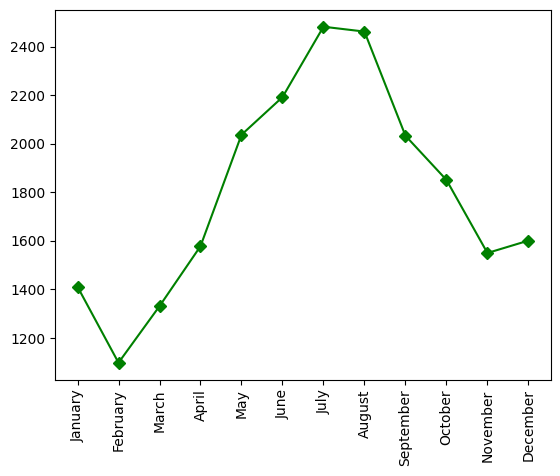

In [150]:
#Sensejus parode

months = nypd_small[['MthName', 'MonthNr']].value_counts().reset_index().sort_values(by='MonthNr')
fig, ax = plt.subplots()

mnames = months['MthName'].values
mnumbers = months['MonthNr']
counts = months["count"].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90)

plt.show()

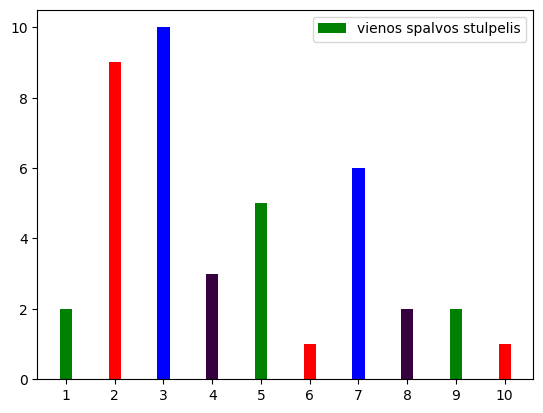

In [155]:
# bar grafikai:
a = np.arange(1,11)
b = np.random.randint(1,11,10)
color_list = ["green", "red", "blue", "xkcd:deep purple"]

fig, ax = plt.subplots()

ax.bar(a, b ,color= color_list, width = 0.25 ,label = "vienos spalvos stulpelis")
ax.set_xticks(a)
ax.legend(loc='best')
plt.show()

In [3]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\ITWORK\Desktop\Python\JupyterNotebooks


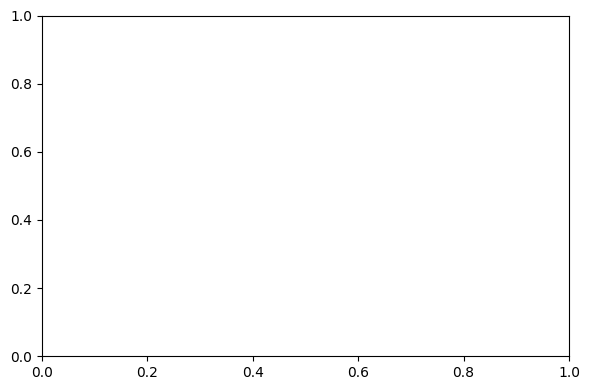

In [4]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

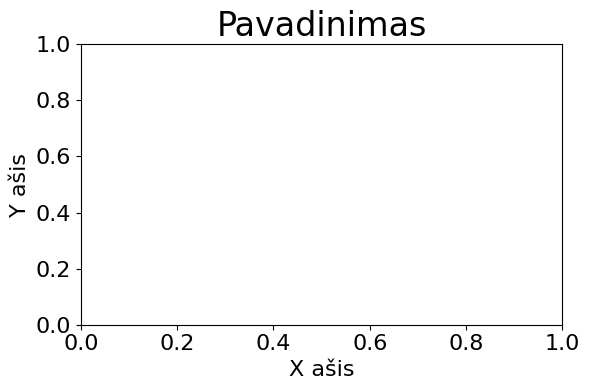

In [5]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


axis.set_xlabel('X ašis', fontsize=fontsize)
axis.set_ylabel('Y ašis', fontsize=fontsize)
axis.set_title('Pavadinimas', fontsize=titlesize)
axis.tick_params(axis='x', labelsize=labelsize)
axis.tick_params(axis='y', labelsize=labelsize)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# :imp -importavimui
# :sfig - vienam grafikui
# :fig - 1nm grafikui su daugiau kodo

In [57]:
#Nuskaitykite DUS2014csv ir DUS2018.csv į pandas lenteles

# .query(), .value_counts():
# Kiek dalyvavo vyrų, moterų apklausoje kiekvienais metais. Suraskite pokytį,
# rezultatus išspausdinkite
dus14 = pd.read_csv("DUS2014.csv")
dus18 = pd.read_csv("DUS2018.csv")


d14s = dus14[["lytis" , "amzius" , "bdu_spalio" , "issilavinimas", "profesija"]]
d14s.head(2)
d18s = dus18[["lytis" , "amzius" , "bdu_spalio" , "issilavinimas", "profesija"]]
d18s.head(10)


,lytis,amzius,bdu_spalio,issilavinimas,profesija
0,F,40-49,460,G2,334
1,M,50-59,1487,G2,722
2,M,40-49,1500,G2,721
3,M,50-59,1500,G2,722
4,F,40-49,400,G2,522
5,F,40-49,400,G2,522
6,F,14-29,400,G2,522
7,M,50-59,400,G2,522
8,F,50-59,400,G2,522
9,F,30-39,400,G2,522


In [24]:
moterys_2014 = d14s[d14s["lytis"]=="F"] 
vyrai_2014 = d14s[d14s["lytis"]=="M"] 
moteru_sk_2014 = moterys_2014['lytis'].value_counts().values[0] 
vyru_sk_2014 = vyrai_2014['lytis'].value_counts().values[0]

moterys_2018 = d18s[d18s["lytis"]=="F"] 
vyrai_2018 = d18s[d18s["lytis"]=="M"]
moteru_sk_2018 = moterys_2018['lytis'].value_counts().values[0]
vyru_sk_2018 = vyrai_2018['lytis'].value_counts().values[0]

moteru_sk_pokytis = moteru_sk_2018-moteru_sk_2014
vyru_sk_pokytis = vyru_sk_2018-vyru_sk_2014

print(moteru_sk_pokytis ,vyru_sk_pokytis ,sep= "\n" )




-1678
-110


In [21]:
moterys_2014["lytis"].value_counts().values

array([22366], dtype=int64)

In [48]:
# kiek 2018 metais buvo respondentų iš kiekvienos amžiaus grupės?

respondetu_sk_2018 = d18s["lytis"].value_counts().sort_values(ascending=False)  
print("respondentų iš kiekvienos amžiaus grupės" ,respondetu_sk_2018)

print("\n" )

# Suraskite vidutinius atlyginimus kiekvienai amžiaus grupei (2018 metams)
# hint:as for ciklas moka eiti per array vertes, kurias gausite su .index arba .values atributais

amziaus_gr = d18s["amzius"].value_counts().index           #cia yra amziaus grupes 14-29,30-39,40-49,50-59)
for amzius in amziaus_gr:
    amziaus_grupes_lentele = d18s.query("amzius ==@amzius")
    vidutinis_atlyginimas = amziaus_grupes_lentele["bdu_spalio"].mean()
    print("Amzius:" ,amzius, "Vidutinis atlyginimas" ,vidutinis_atlyginimas)




respondentų iš kiekvienos amžiaus grupės lytis
M    22476
F    20688
Name: count, dtype: int64


Amzius: 50-59 Vidutinis atlyginimas 856.0671241050119
Amzius: 40-49 Vidutinis atlyginimas 980.8554293599406
Amzius: 14-29 Vidutinis atlyginimas 865.5633005977796
Amzius: 30-39 Vidutinis atlyginimas 1088.9557207498383
Amzius: 60+ Vidutinis atlyginimas 784.542386341076


In [62]:
# Suraskite vidutinius atlyginimuspagal issilavinimas (2018 metams)



Issilavinimo_Gr = d18s["issilavinimas"].value_counts().sort_index(ascending=True).index
# Issilavinimo_Gr = d18s["issilavinimas"].value_counts().index       Ten sort panaudojom,kad is eiles rasytu 
print(Issilavinimo_Gr)
for grupe in Issilavinimo_Gr :
    Issilavinimo_GR_lentele = d18s.query("issilavinimas ==@grupe")
    vidutinis_atlyginimas_Issilavinimo = Issilavinimo_GR_lentele["bdu_spalio"].mean()
    print("Issilavinimo grupe:" ,grupe, "Vidutinis atlyginimas" ,vidutinis_atlyginimas_Issilavinimo)


Index(['G1', 'G2', 'G3', 'G4'], dtype='object', name='issilavinimas')
Issilavinimo grupe: G1 Vidutinis atlyginimas 626.3916786226686
Issilavinimo grupe: G2 Vidutinis atlyginimas 732.6871572212066
Issilavinimo grupe: G3 Vidutinis atlyginimas 1094.7640256572408
Issilavinimo grupe: G4 Vidutinis atlyginimas 1246.4511960095226


In [64]:
# Palyginkite, kiek procentais daugiau uždirbo vyrai už moteris 2018 metais?
# Kiek procentais vyrai uždirba daugiau, nei bendras atlyginimų vidurkis?
# Kiek procentais moterys uždirba mažiau, nei bendras atlyginimų vidurkis?
# imkite bdu_spalio

vyrai_2018 = d18s[d18s["lytis"]=="M"]
vyruvid18 = vyrai_2018["bdu_spalio"].mean()
moterys_2018 = d18s[d18s["lytis"]=="F"]  
moteruvid18 = moterys_2018["bdu_spalio"].mean()
vidutinis_atlyginimas = d18s["bdu_spalio"].mean()

print("Vidutinis atlyginimas" , vidutinis_atlyginimas)
print("moteruvid18" , moteruvid18)
print("vyruvid18" ,  vyruvid18)
print("\n" )

vyraidaugiau_procentais = (moteruvid18 *100 / vyruvid18 -100)* -1
print(vyraidaugiau_procentais , ":procentais daugiau uždirbo vyrai už moteris 2018 metais" )

moterysmaziau_procentaisuzvyrus = vyruvid18  *100 / vidutinis_atlyginimas -100
print(moterysmaziau_procentaisuzvyrus , ":procentais daugiau uždirbo vyrai už  2018 metu vidurki" )

moterysmaziau_procentais = (moteruvid18  *100 / vidutinis_atlyginimas -100)*-1
print(moterysmaziau_procentais , ":procentais daugiau uždirbo mo už  2018 metu vidurki" )


Vidutinis atlyginimas 927.0983690112131
moteruvid18 832.1469450889405
vyruvid18 1014.4962626801922


17.974370561948064 :procentais daugiau uždirbo vyrai už moteris 2018 metais
9.427035640478195 :procentais daugiau uždirbo vyrai už  2018 metu vidurki
10.241785240496341 :procentais daugiau uždirbo vyrai už  2018 metu vidurki


In [95]:
# Nuskaitykite aruodas.csv failą
# Pridėkite prie DataFrame'o naują stulpelį "KainaS", kur būtų skaičiai (float'ai) iš stulpelio "€/S"
# tam panaudokite savo sukurtą funkciją, kuri tekstą verstų į float'us
# bei .apply() metodą
# Suraskite vidutinę kv. m. kainą.

aruod = pd.read_csv("aruodas.csv")
aruod.head(5)

def Floatinisreikalas(kvadratai):
    kvadratokaina = float(kvadratai.split("€")[0])
    return kvadratokaina

aruod['KainaS'] = aruod["€/S"].apply(Floatinisreikalas)  
vidutine_kaina = aruod['KainaS'].mean()
aruod.head(6)




,Unnamed: 0,Linkas,Adresas,Kaina,€/S,Aukštas,Plotas,Kambariai,KainaS
0,0,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",155 000 €,3690€/m²,4/4,42.00,2,3690.0
1,1,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Pavilnionių g.",125 880 €,2977€/m²,4/4,42.28,2,2977.0
2,2,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",166 000 €,3773€/m²,2/4,44.00,2,3773.0
3,3,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Perkūnkiemio g.",109 900 €,3283€/m²,7/12,33.48,1,3283.0
4,4,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Pilkalnio g.",137 000 €,3703€/m²,4/4,37.00,2,3703.0
5,5,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Tvankstos g.",194 500 €,3536€/m²,1/4,55.00,3,3536.0


In [96]:
vidutine_kaina = aruod['KainaS'].mean()
print(vidutine_kaina)
Nvidkaina = np.mean(aruod["KainaS"])          #kitas ubdas naudojant numpy
print(Nvidkaina)


3301.46678555506
3301.46678555506


In [113]:
#Dar su aruodas.csv:
# Suraskite, kiek buvo pigių, kiek buvo brangių butų (mažiau už vidutinę kainą, daugiau nei vidutinė kaina)
#Suraskite vidutinį butų plotą.

pigus = []
brangus = []

for skaicius in aruod['KainaS']: 
    if skaicius > vidutine_kaina :
        brangus.append(skaicius)
        brangiubutuskaicius = len(brangus)
    else:
        pigus.append(skaicius)
        pigiubutuskaicius = len(pigus)

print("pigus butai:" ,pigiubutuskaicius)
print("brangus butai:" , brangiubutuskaicius)

vidutinis_plotas = aruod['Plotas'].mean()
print("Vidutinis plotas" ,vidutinis_plotas)

pigus butai: 1283
brangus butai: 960
Vidutinis plotas 60.41541685242979


In [ ]:
# Remigijaus Aruodas:
#Pridėkite prie DataFrame'o naują stulpelį "KainaS", kur būtų skaičiai (float'ai) iš stulpelio "€/S"
# tam panaudokite savo sukurtą funkciją, kuri tekstą verstų į float'us
# bei .apply() metodą
f = '3690€/m²' # formule keicianti is str i float
def vertimas(el):
    elF = float(el[:-4])
    return elF
ats = vertimas(f)
print(ats)
aruod['KainaS'] = aruod['€/S'].apply(vertimas) # pritaikymas anksciau parasytos formules
aruod.head(5)
#  Suraskite vidutinę kv. m. kainą.
VidKaina = aruod['KainaS'].mean()
print(VidKaina)
NVidKaina = np.mean(aruod['KainaS'])
print(NVidKaina)

In [88]:
autopliusSmaller.head(5)

,rida,gamintojas,price
0,253 000 km,BMW,19 500
1,195 405 km,Mitsubishi,2 700
2,129 800 km,Seat,13 490
3,183 000 km,Skoda,14 650
4,127 896 km,Volvo,38 000


Vidutine kaina 8831.85375
Kokia kaina
pigūs         1477
brangūs        584
vidutiniai     339
Name: count, dtype: int64


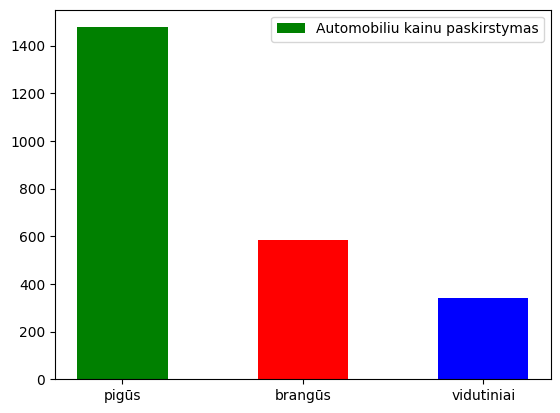

In [164]:
#AUTO.CSV failas:
#Raskite vidutinę kainą, ridą visiems automobiliams bei atskirai šiems: BMW, Audi, Toyota, Vokswagen, Ford.
#Suskirstykite automobilius pagal santykį su vidutine kaina:
# < 0.75 avg - pigūs
# 0.75 iki 1.15 avg - vidutiniai, 
# > 1.15 avg - brangūs
# Kiek kiekvienoje grupėje buvo tokių auto?
#tai vizualizuokite su bar 


autoplius= pd.read_csv("auto.csv", sep= "|") 

autopliusSmaller = autoplius [["rida" , "gamintojas" , "price"]] #susikuriam mazesne lentele
def Floatinisreikalas_kainai(konvertuojam):
    konvertacijakainos = float(konvertuojam.replace(" ",""))
    return konvertacijakainos

autopliusSmaller["Kaina"] = autopliusSmaller["price"].apply(Floatinisreikalas_kainai)
autopliusSmaller.head(5)

vidutine_kaina = autopliusSmaller['Kaina'].mean()
print("Vidutine kaina" , vidutine_kaina)

def Floatinisreikalas_ridai(konvertuojam):
    if "nenur" in konvertuojam.lower():
        return 0
    else:
        konvertacijaridos = float(konvertuojam.replace(" ","")[:-2]) 
        return konvertacijaridos

autopliusSmaller["Rida"] = autopliusSmaller["rida"].apply(Floatinisreikalas_ridai)
autopliusSmaller.head(5)

def Kainuskirstymas(money):
    pavadinam = ""                
    if money <=0.75*vidutine_kaina:
        pavadinam = "pigūs"                                     # cia pakeiciam pavadinam reiksme, suteikiam nauja
    elif money >=1.15*vidutine_kaina:
        pavadinam = "brangūs"
    else:
        pavadinam = "vidutiniai"
    return pavadinam

autopliusSmaller["Kokia kaina"] = autopliusSmaller["Kaina"].apply(Kainuskirstymas)

suskirstymas_pagal_kainas = autopliusSmaller["Kokia kaina"].value_counts()
print(suskirstymas_pagal_kainas)


a = suskirstymas_pagal_kainas.index
b =suskirstymas_pagal_kainas.values
color_list = ["green", "red", "blue"]
fig, ax = plt.subplots()

ax.bar(a, b ,color= color_list, width = 0.5 ,label = "Automobiliu kainu paskirstymas")
ax.set_xticks(a)
ax.legend(loc='best')
plt.show()


In [141]:
import warnings
warnings.filterwarnings('ignore')

In [186]:

#Su Dar su life-exp.csv:
#Nuskaitykite failą
#Suraskite vidutinę, minimalią, maksimalią gyvenimo trukmę Lietuvai, 
# Latvijai, Švedijai, Vokietijai
# Padarykite, jog vartotojas galėtų įvesti, kokios šalies
# duomenis reikia išvesti
#Bonus - .plot() vizualizacija tokių duomenų:
# gyvenimo trukmė kiekvienais metais Lietuvai ir vartotojo įvestai šaliai


#atrinkite su .query() į naują lentelę tik 2019 metų duomenis.
# Toliau naudojama tik naujoji lentelė

LifeExp= pd.read_csv("life-exp.csv") 
naujoji_lentele2019 = LifeExp.query('Year == 2019')

# Suraskite vidutinę gyvenimo trukmę
vid_gyv_trukme = naujoji_lentele2019["Life expectancy"].mean()
print("vid_gyv_trukme:", vid_gyv_trukme)

# Suskirstykite valstybes į ilgaamžes ir ne
# jei gyvenimo trukmė mažiau nei vidurkis - neilgaamžė
# jei didesnė - ilgaamžė.
# Kiek buvo valstybių ilgaamžių, neilgaamžių?
#  .query() duomenų filtravimas ir atrinkimas

def gyvenimo_trukme(amzius):
    if amzius > vid_gyv_trukme:
        return "ilgaamžis"
    else: return "neilgaamžis"

naujoji_lentele2019["Gyvenimo trukme"] = naujoji_lentele2019["Life expectancy"].apply(gyvenimo_trukme)
suskirstymas_pagal_metus = naujoji_lentele2019["Gyvenimo trukme"].value_counts()
print(suskirstymas_pagal_metus)
naujoji_lentele2019.head(5)

# naujoji_lentele2019.query("lytis =='neilgaamžis' and issilavinimas =='ilgaamžis'").value_counts()




vid_gyv_trukme: 73.83298925497944
Gyvenimo trukme
ilgaamžis      138
neilgaamžis    105
Name: count, dtype: int64


,Entity,Code,Year,Life expectancy,Gyvenimo trukme
15552,Afghanistan,AFG,2019,64.833,neilgaamžis
15553,Africa,NaN,2019,63.170,neilgaamžis
15554,Albania,ALB,2019,78.573,ilgaamžis
15555,Algeria,DZA,2019,76.880,ilgaamžis
15556,American Samoa,ASM,2019,73.745,neilgaamžis


In [174]:
# Su life-exp.csv:
life=pd.read_csv('life-exp.csv')
#atrinkite su .query() į naują lentelę tik 2019 metų duomenis.
life_new = life.query('Year == 2019')
life_new.head(5)
# Toliau naudojama tik naujoji lentelė
# Suraskite vidutinę gyvenimo trukmę
vid_gyv_trukmė = life_new['Life expectancy'].mean()
print('vidutinė gyvenimo trukmė', vid_gyv_trukmė)
# Suskirstykite valstybes į ilgaamžes ir ne
# jei gyvenimo trukmė mažiau nei vidurkis - neilgaamžė
# jei didesnė - ilgaamžė.
# Kiek buvo valstybių ilgaamžių, neilgaamžių?
#  .query() duomenų filtravimas ir atrinkimas
def gyv_trukme(amzius):
    if amzius > vid_gyv_trukmė:
        return "ilgaamžis"
    else: return "neilgaamžis"
life_new['Ilgaamžiškumas'] = life_new['Life expectancy'].apply(gyv_trukme)    
ilgaam = life_new[life_new['Life expectancy'] > vid_gyv_trukmė]['Life expectancy'].count()
neilgaam = life_new[life_new['Life expectancy'] < vid_gyv_trukmė]['Life expectancy'].count()
print('Ilgaamžių valstybių kiekis', ilgaam)
print('Neilgaamžių valstybių kiekis', neilgaam)
ilg = life_new["Ilgaamžiškumas"].value_counts()
print(ilg)

vidutinė gyvenimo trukmė 73.83298925497944
Ilgaamžių valstybių kiekis 138
Neilgaamžių valstybių kiekis 105
Ilgaamžiškumas
ilgaamžis      138
neilgaamžis    105
Name: count, dtype: int64


In [16]:
# duoti sąrašai:
x = [12,16,17,1,0,-1,-8,10,14]
y = ["Vilnius", 1323, 'Kaunas', 'Alytus', 'omega', -42, 42]
z = ["Vilnius", 1323,[4,5,6], 'Kaunas', 'Alytus', 'omega', -42, 42, [1,2,3]]
# su map () ir savo pasirašyta funkcija sugeneruokite naujus sąrašus, kur 
# būtų simbolių kiekiai iš sąrašų x ir y.

# def Simboliai(sarasas):
#     simboliuSk = []
#     for e in sarasas:
#         simboliuSk.append(len(str(e)))
#     return simboliuSk
# print(Simboliai(x)) arba: 

def simb(e):
    return len(str(e))
x1 = list(map(simb, x))                    #paima funkcija ir sarasa, ima is saraso viena elementa ir tam skaiciui pritaiko funkcija
print(x1)
y1 = list(map(simb, y))
print(y1)


# advanced: skaidrėse susiraskite prie if'o is operatorių ir pavyzdžius su type()
# ir sugeneruokite naują sąrašą iš z'o:
#  kur tekstas - tai suskaičiuojate simbolių kiekį,
# kur skaičius - padauginate iš 2.5
#  kur sąrašas - randate sąrašo skaičiųą sumą

z = ["Vilnius", 1323,[4,5,6], 'Kaunas', 'Alytus', 'omega', -42, 42, [1,2,3]] 
sarasasZ = []
for a in z:
    if type(a) == str:
        sarasasZ.append(len(a))
    elif type(a) == int:
        sarasasZ.append(a*2.5)
    elif type(a) == list:
        sarasasZ.append(sum(a))
print(sarasasZ)

[2, 2, 2, 1, 1, 2, 2, 2, 2]
[7, 4, 6, 6, 5, 3, 2]
[7, 3307.5, 15, 6, 6, 5, -105.0, 105.0, 6]


In [17]:
#Rasa uzjudejo: 
#advanced: skaidrėse susiraskite prie if'o is operatorių ir pavyzdžius su type()
# ir sugeneruokite naują sąrašą iš z'o:
# kur tekstas - tai suskaičiuojate simbolių kiekį, kur skaičius - padauginate iš 2.5
# kur sąrašas - randate sąrašo skaičiųą sumą

def veiksmai(elementas):
    if type(elementas) is str:
        return len(str(elementas))
    elif type(elementas) is int:
        return float(elementas)*2.5
    elif type(elementas) is list:
        return sum(elementas)
z2 = list(map(veiksmai,z))
print(z2)

[7, 3307.5, 15, 6, 6, 5, -105.0, 105.0, 6]


In [13]:
s = 'A'
lst = []
dct = {}
sets = set()
flt = 1.0
intgr = 7
tpl = (7,)
print(type(s), type(s) is str)
print(type(lst), type(lst) is list)
print(type(dct), type(dct) is dict)
print(type(sets), type(sets) is set)
print(type(flt), type(flt) is float)
print(type(intgr), type(intgr) is int)
print(type(tpl), type(tpl) is tuple)

<class 'str'> True
<class 'list'> True
<class 'dict'> True
<class 'set'> True
<class 'float'> True
<class 'int'> True
<class 'tuple'> True


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [26]:
miestai = pd.read_excel("miestai.xlsx")
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
0,Vilnius,0,1323 m.,1387 m.,16,557440
1,Kaunas,102,1361 m.,1408 m.,13,286763
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898
3,Šiauliai,213,1236 m.,1713 m.,14,100119
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148


In [42]:
# Pridėkite du naujus stulpelius: Miesto amžius bei kiek metų jis turi miesto teises.

def MiestuAmzius(Miestas):
    return 2024-  float(str(Miestas)[0:4])

miestai["Miesto Amzius"] = miestai["Paminėjimo metai"].apply(MiestuAmzius)
miestai.head()

def MiestuTeises(Miestas):
    try:
        return 2024-  float(str(Miestas)[0:4])
    except:
        return -1
miestai["Miesto Teises"] = miestai["Gautos miesto teisės"].apply(MiestuTeises)
miestai.head()

# Su query() atrinkite miestus, kuriuose yra daugiau nei 50 tūkst žmonių,
# raskite žmonių kiekio vidurkį.
# Atrinkite miestus, įkurtus seniau, nei 1500 m, ir raskite bendrą gyventojų skaičių 
# šiuose miestuose.

atrinkti_miestai = miestai.query("`Gyventojų skaičius`> 50000")       #!!!!!!!!!!!!!!jei stulpelio pavadinime query yra tarpas butinai reikia pazymeti ji `(back tiq)!!!!!!!!!!
gyvvidurkis = atrinkti_miestai["Gyventojų skaičius"].mean()
print(gyvvidurkis)

atrinkti_miestai.head(35)

miestai1500 =  miestai.query("`Miesto Amzius`> (2024-1500)") 
miestai1500.head(35)

Gyvsk = miestai1500["Gyventojų skaičius"].sum()
print(Gyvsk)

204964.83333333334
1463422


In [22]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.0 kB 1.3 MB/s eta 0:00:01
   -------------------------------- ------- 204.8/250.0 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
miestai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Miestas                103 non-null    object 
 1   Atstumas iki sostinės  103 non-null    int64  
 2   Paminėjimo metai       103 non-null    object 
 3   Gautos miesto teisės   103 non-null    object 
 4   Apskritis              103 non-null    object 
 5   Gyventojų skaičius     103 non-null    int64  
 6   Miesto Amzius          103 non-null    float64
 7   Miesto Teises          103 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.6+ KB


In [46]:
miestai.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
0,Vilnius,0,1323 m.,1387 m.,16,557440
1,Kaunas,102,1361 m.,1408 m.,13,286763
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898
3,Šiauliai,213,1236 m.,1713 m.,14,100119
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148


In [45]:
miestai = pd.read_excel("miestai.xlsx")
miestai.head()
apskritys = pd.read_csv("apskritys.csv")
apskritys.head()


,index,Apskritis,Kodas
0,0,Vilniaus,16
1,1,Šiaulių,14
2,2,Kauno,13
3,3,Panevėžio,11
4,4,Utenos,10


In [47]:
# .merge()

miestaiSuApskritimis = pd.merge(left= miestai , right= apskritys , left_on='Apskritis' , right_on = "Kodas" , how ='inner')  #inner nebutina rasyti
miestaiSuApskritimis.head(30)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis_x,Gyventojų skaičius,index,Apskritis_y,Kodas
0,Marijampolė,138,1667 m.,1792 m.,9A,35253,6,Marijampolės,9A
1,Mažeikiai,291,1501,1924 m.,7A,32711,8,Telšių,7A
2,Tauragė,230,1499 m.,1924 m.,7B,21685,9,Tauragės,7B
3,Telšiai,285,1450 m.,1791 m.,7A,21548,8,Telšių,7A
4,Plungė,287,1567 m.,1792 m.,7A,16945,8,Telšių,7A
5,Jurbarkas,188,1258 m.,1611 m.,7B,9831,9,Tauragės,7B
6,Vilkaviškis,161,1501,1660 m.,9A,9621,6,Marijampolės,9A
7,Kazlų Rūda,136,1737 m.,1950 m.,9A,5666,6,Marijampolės,9A
8,Šakiai,164,1599 m.,XIX a. 1-oji pusė,9A,5003,6,Marijampolės,9A
9,Šilalė,245,1501,1952 m.,7B,4728,9,Tauragės,7B


In [56]:
#groupby ()

mgr = miestaiSuApskritimis.groupby(by="Apskritis_y")

In [55]:
miestai = pd.read_excel('miestai.xlsx')
miestai['Apskritis'] = miestai['Apskritis'].apply(str)            
apskritys = pd.read_csv('apskritys.csv')
apskritys['Kodas'] = apskritys['Kodas'].apply(str) 

In [57]:
# .merge()

miestaiSuApskritimis =  pd.merge(left=miestai, right=apskritys,
                                 left_on='Apskritis', right_on='Kodas', how='left')
miestaiSuApskritimis.head()

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis_x,Gyventojų skaičius,index,Apskritis_y,Kodas
0,Vilnius,0,1323 m.,1387 m.,16,557440,0,Vilniaus,16
1,Kaunas,102,1361 m.,1408 m.,13,286763,2,Kauno,13
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898,5,Klaipėdos,9
3,Šiauliai,213,1236 m.,1713 m.,14,100119,1,Šiaulių,14
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148,3,Panevėžio,11


In [58]:
# .groupby()

mgr = miestaiSuApskritimis.groupby(by='Apskritis_y')

In [59]:
mgr.groups.keys()       #taip galime perziureti kokia grupes pandas sudare

dict_keys(['Alytaus', 'Kauno', 'Klaipėdos', 'Marijampolės', 'Panevėžio', 'Tauragės', 'Telšių', 'Utenos', 'Vilniaus', 'Šiaulių'])

In [60]:
#agregacijos:
mgr.mean(numeric_only = True)

,Atstumas iki sostinės,Gyventojų skaičius,index
Apskritis_y,,,
Alytaus,116.000000,11109.142857,7.0
Kauno,110.384615,29637.538462,2.0
Klaipėdos,315.777778,24508.000000,5.0
Marijampolės,162.666667,7549.333333,6.0
Panevėžio,166.636364,11621.090909,3.0
Tauragės,224.000000,5704.571429,9.0
Telšių,280.428571,11147.000000,8.0
Utenos,116.500000,7114.900000,4.0
Vilniaus,44.625000,41005.562500,0.0


In [61]:
mgr.mean(numeric_only = True).reset_index()

,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,116.000000,11109.142857,7.0
1,Kauno,110.384615,29637.538462,2.0
2,Klaipėdos,315.777778,24508.000000,5.0
3,Marijampolės,162.666667,7549.333333,6.0
4,Panevėžio,166.636364,11621.090909,3.0
5,Tauragės,224.000000,5704.571429,9.0
6,Telšių,280.428571,11147.000000,8.0
7,Utenos,116.500000,7114.900000,4.0
8,Vilniaus,44.625000,41005.562500,0.0
9,Šiaulių,226.857143,11872.142857,1.0


In [64]:
mgr.sum(numeric_only = True).reset_index()

,Apskritis_y,Atstumas iki sostinės,Gyventojų skaičius,index
0,Alytaus,812,77764,49
1,Kauno,1435,385288,26
2,Klaipėdos,2842,220572,45
3,Marijampolės,1464,67944,54
4,Panevėžio,1833,127832,33
5,Tauragės,1568,39932,63
6,Telšių,1963,78029,56
7,Utenos,1165,71149,40
8,Vilniaus,714,656089,0
9,Šiaulių,3176,166210,14


In [65]:
mgrII = miestaiSuApskritimis[["Miestas" , "Gyventojų skaičius" ,"Apskritis_y"]].groupby(by = "Apskritis_y")
mgrII.sum(numeric_only=True).reset_index()

,Apskritis_y,Gyventojų skaičius
0,Alytaus,77764
1,Kauno,385288
2,Klaipėdos,220572
3,Marijampolės,67944
4,Panevėžio,127832
5,Tauragės,39932
6,Telšių,78029
7,Utenos,71149
8,Vilniaus,656089
9,Šiaulių,166210


In [66]:
mgrII.count()

,Miestas,Gyventojų skaičius
Apskritis_y,,
Alytaus,7,7
Kauno,13,13
Klaipėdos,9,9
Marijampolės,9,9
Panevėžio,11,11
Tauragės,7,7
Telšių,7,7
Utenos,10,10
Vilniaus,16,16


In [69]:
mgrII.get_group("Marijampolės")              #grazina dataframe'a 

,Miestas,Gyventojų skaičius,Apskritis_y
6,Marijampolė,35253,Marijampolės
31,Vilkaviškis,9621,Marijampolės
43,Kazlų Rūda,5666,Marijampolės
48,Šakiai,5003,Marijampolės
52,Kybartai,4575,Marijampolės
58,Kalvarija,3858,Marijampolės
74,Gelgaudiškis,1603,Marijampolės
76,Kudirkos Naumiestis,1480,Marijampolės
92,Virbalis,885,Marijampolės


In [70]:
dus18 = pd.read_csv('DUS2018.csv')
du18 = dus18[['lytis','issilavinimas','bdu_spalio', 'amzius']]
du18.head()

,lytis,issilavinimas,bdu_spalio,amzius
0,F,G2,460,40-49
1,M,G2,1487,50-59
2,M,G2,1500,40-49
3,M,G2,1500,50-59
4,F,G2,400,40-49


In [71]:
dugr = du18.groupby(by=["lytis",'issilavinimas'])
dugr.groups.keys()

dict_keys([('F', 'G1'), ('F', 'G2'), ('F', 'G3'), ('F', 'G4'), ('M', 'G1'), ('M', 'G2'), ('M', 'G3'), ('M', 'G4')])

In [72]:
dugr.get_group(("F" , 'G1'))

,lytis,issilavinimas,bdu_spalio,amzius
278,F,G1,436,60+
578,F,G1,1050,30-39
592,F,G1,440,60+
594,F,G1,596,40-49
595,F,G1,660,50-59
...,...,...,...,...
42657,F,G1,848,14-29
42761,F,G1,460,40-49
42762,F,G1,154,14-29
42765,F,G1,585,50-59


In [73]:
dugr.mean(numeric_only = True)

bdu_spalio
lytis issilavinimas             
F     G1              524.975701
      G2              627.524763
      G3              937.024554
      G4             1101.596986
M     G1              689.555297
      G2              807.371033
      G3             1269.916492
      G4             1458.712409

In [74]:
dugr.mean(numeric_only = True).unstack()

bdu_spalio                                      
issilavinimas          G1          G2           G3           G4
lytis                                                          
F              524.975701  627.524763   937.024554  1101.596986
M              689.555297  807.371033  1269.916492  1458.712409

<Axes: xlabel='lytis,issilavinimas'>

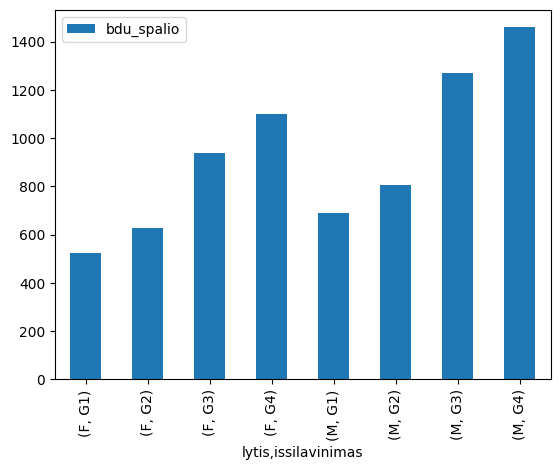

In [75]:
dugr.mean(numeric_only=True).plot(kind= "bar")

<Axes: xlabel='lytis'>

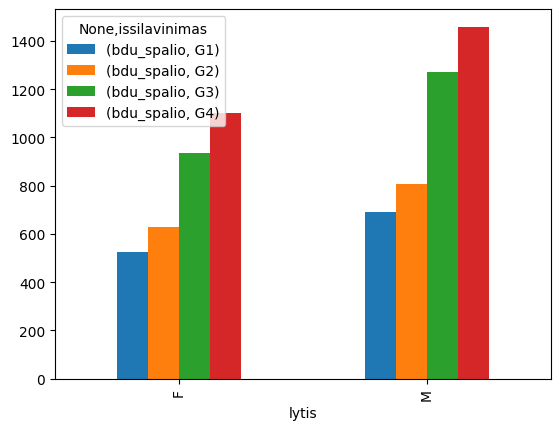

In [76]:
dugr.mean(numeric_only=True).unstack().plot(kind= "bar")

In [77]:
# sugrupuokite dus2018 pagal išssilavinimą, suraskite vidutinį atlyginimą
#  sugrupuokite pagal amžiaus grupes, suraskite vidutinį atlyginimą
dus18 = pd.read_csv('DUS2018.csv')
du18 = dus18[['lytis','issilavinimas','bdu_spalio', 'amzius']]
du18.head()

,lytis,issilavinimas,bdu_spalio,amzius
0,F,G2,460,40-49
1,M,G2,1487,50-59
2,M,G2,1500,40-49
3,M,G2,1500,50-59
4,F,G2,400,40-49


In [91]:
# sugrupuokite dus2018 pagal išssilavinimą, suraskite vidutinį atlyginimą
du18.groupby(by="issilavinimas").mean(numeric_only=True)

,bdu_spalio
issilavinimas,
G1,626.391679
G2,732.687157
G3,1094.764026
G4,1246.451196


In [96]:
# sugrupuokite dus2018 pagal išssilavinimą, suraskite vidutinį atlyginimą
#mano ilgasis budas
issilavinimogrupe = du18.groupby("issilavinimas")
issilavinimogrupe.head()
issilavinimoAlgosVidurkis = issilavinimogrupe["bdu_spalio"]
vidIssilavinimoAlgos = issilavinimoAlgosVidurkis.mean()
vidIssilavinimoAlgos.head()

issilavinimas
G1     626.391679
G2     732.687157
G3    1094.764026
G4    1246.451196
Name: bdu_spalio, dtype: float64

In [99]:
#  sugrupuokite pagal amžiaus grupes, suraskite vidutinį atlyginimą
du18.groupby(by="amzius").mean(numeric_only=True)

,bdu_spalio
amzius,
14-29,865.563301
30-39,1088.955721
40-49,980.855429
50-59,856.067124
60+,784.542386


In [85]:
#  sugrupuokite pagal amžiaus grupes, suraskite vidutinį atlyginimą
#mano ilgasis budas
amziausgrupe = du18.groupby("amzius")
amziausgrupe.head()

amziausGrupesAlgosVidurkis = amziausgrupe["bdu_spalio"]
vidutinesAmziauAlgos = amziausGrupesAlgosVidurkis.mean()
vidutinesAmziauAlgos.head()

amzius
14-29     865.563301
30-39    1088.955721
40-49     980.855429
50-59     856.067124
60+       784.542386
Name: bdu_spalio, dtype: float64

<Axes: xlabel='amzius'>

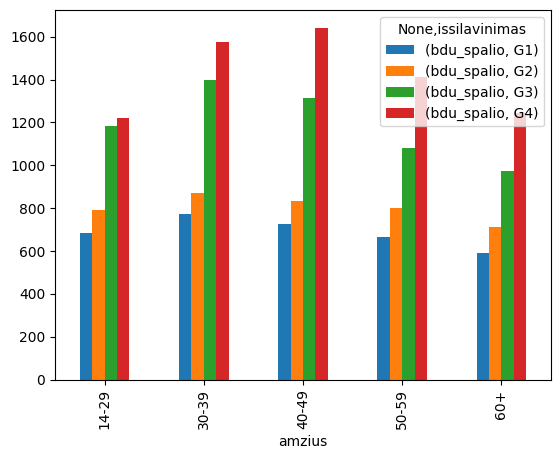

In [101]:
# Sugrupuokite pagal amžiaus grupes IR išsilavinimą, atskirai vyrus, atskirai moteris, suraskite vidutinius atlyginimus.
# pritaikytkite ką tik rodytą informaciją ir
# vizualizuokite barais priklausomybę tarp išssilavinimo, amžiaus grupės ir vidutiniio atlyginimo

dugr= du18.query('lytis=="M"').groupby(by=['amzius', 'issilavinimas'])
dugr.groups.keys()
dugr.mean(numeric_only=True).unstack().plot(kind='bar')

<Axes: xlabel='amzius'>

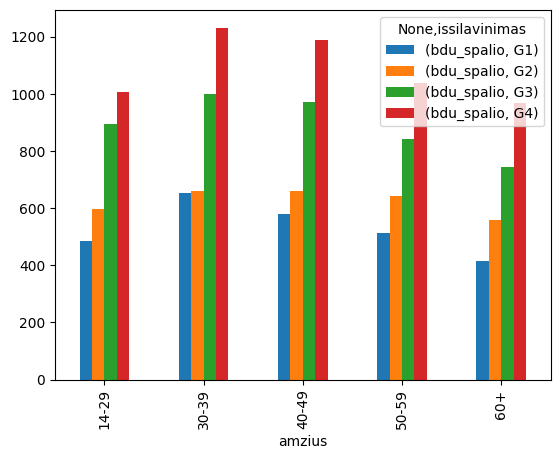

In [100]:
# sugrupavimasPagalMoteris = du18.query("lytis =='F")
dugr= du18.query('lytis=="F"').groupby(by=['amzius', 'issilavinimas'])
dugr.groups.keys()
dugr.mean(numeric_only=True).unstack().plot(kind='bar')

In [ ]:
# .sort_values(by=)
# .tail() , .head()

In [103]:
miestai.head(5)

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
0,Vilnius,0,1323 m.,1387 m.,16,557440
1,Kaunas,102,1361 m.,1408 m.,13,286763
2,Klaipėda,311,1252 m.,1257–1258 m.,9,147898
3,Šiauliai,213,1236 m.,1713 m.,14,100119
4,Panevėžys,136,1503 m.,1791–1792 m.,11,87148


In [105]:
miestai.sort_values(by="Atstumas iki sostinės").tail()                     #surusiavo didziausius atstumus iki sostines

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius
80,Salantai,311,1556 m.,1950 m.,9,1360
16,Kretinga,314,1253 m.,1609 m.,9,16840
17,Palanga,326,1253 m.,1791–1792 m.,9,15666
47,Skuodas,337,1253 m.,1572 m.,9,5289
60,Neringa,358,1385 m.,1961 m.,9,3464


In [114]:
# suraskite 5kis seniausius ir penkis naujausius miestus


def MiestuAmzius(Miestas):
    return 2024-  float(str(Miestas)[0:4])

miestai["Miesto Amzius"] = miestai["Paminėjimo metai"].apply(MiestuAmzius)
miestai.head()


def MiestuTeises(Miestas):
    try:
        return 2024-  float(str(Miestas)[0:4])
    except:
        return -1
miestai["MiestoTeises"] = miestai["Gautos miesto teisės"].apply(MiestuTeises)
miestai.head()

miestai.sort_values(by="Miesto Amzius").tail()     



,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Miesto Amzius,MiestoTeises
13,Ukmergė,72,1201,1792 m.,16,20391,823.0,232.0
57,Švenčionys,84,1201,1800 m.,16,4139,823.0,224.0
56,Trakai,27,1201,XIV a. pab. – XV a. pr.,16,4238,823.0,-1.0
40,Pasvalys,182,1201,1946 m.,11,6490,823.0,78.0
78,Ramygala,146,1201,1956 m.,11,1415,823.0,68.0


In [113]:

miestai.sort_values(by="Miesto Amzius").head()  

,Miestas,Atstumas iki sostinės,Paminėjimo metai,Gautos miesto teisės,Apskritis,Gyventojų skaičius,Miesto Amzius,MiestoTeises
14,Visaginas,152,1975 m.,1977 m.,10,18185,49.0,47.0
68,Venta,268,1966 m.,1978 m.,14,2213,58.0,46.0
23,Elektrėnai,48,1960 m.,1962 m.,16,11276,64.0,62.0
38,Naujoji Akmenė,269,1952 m.,1952 m.,14,7266,72.0,72.0
85,Baltoji Vokė,35,1950 m.,1958 m.,16,1052,74.0,66.0


In [123]:
nypd.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-15 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-15 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571
2,193118596,2019-02-02,2024-04-15 19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480
3,204192600,2019-10-24,2024-04-15 00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108
4,201483468,2019-08-22,2024-04-15 18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339


In [3]:
# nuskaitykite NYPD.
#Suraskite, kiek kieviename rajone (BORO) buvo susišaudymų.
nypd = pd.read_csv("NYPD_Shooting.csv" ,sep=";" , parse_dates = ["OCCUR_DATE" , "OCCUR_TIME"])
nypd.head()

rajonoSaudynes = nypd["BORO"].value_counts().reset_index()
rajonoSaudynes



C:\Users\ITWORK\AppData\Local\Temp\ipykernel_12436\3399887891.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd = pd.read_csv("NYPD_Shooting.csv" ,sep=";" , parse_dates = ["OCCUR_DATE" , "OCCUR_TIME"])


,BORO,count
0,BROOKLYN,8913
1,BRONX,6195
2,QUEENS,3225
3,MANHATTAN,2647
4,STATEN ISLAND,646


In [4]:
# prisidėkite stulpelį, kuriame būtų tik įvykio laiko valandos

nypd["Ivykio_laiko_valandos"] = nypd ["OCCUR_TIME"].dt.hour
nypd.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,Ivykio_laiko_valandos
0,201575314,2019-08-23,2024-04-16 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141,22
1,205748546,2019-11-27,2024-04-16 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571,15
2,193118596,2019-02-02,2024-04-16 19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480,19
3,204192600,2019-10-24,2024-04-16 00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108,0
4,201483468,2019-08-22,2024-04-16 18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339,18


In [5]:
# Suraskite, kiek ir kokios rasės buvo nusikaltėlių; aukų?

offenderiuRase = nypd["PERP_RACE"].value_counts()
print("nusikaltėlių::::::::::::" , offenderiuRase)

aukuRase = nypd["VIC_RACE"].value_counts()
print("aukų:::::::::::::::::" , aukuRase)


nusikaltėlių:::::::::::: PERP_RACE
BLACK                             9336
UNKNOWN                           1839
WHITE HISPANIC                    1827
BLACK HISPANIC                    1007
WHITE                              239
ASIAN / PACIFIC ISLANDER           105
AMERICAN INDIAN/ALASKAN NATIVE       2
Name: count, dtype: int64
aukų::::::::::::::::: VIC_RACE
BLACK                             15470
WHITE HISPANIC                     3105
BLACK HISPANIC                     2085
WHITE                               578
ASIAN / PACIFIC ISLANDER            286
UNKNOWN                              93
AMERICAN INDIAN/ALASKAN NATIVE        9
Name: count, dtype: int64


In [16]:
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.
#atsifiltruoti viena rajona ir pabandyti nubraizyti jam grafika, kiek yra suisaudymu kiekvienai valandai

# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.
# Rodo tik vieno rajono statistika


A = nypd.query('BORO == "BRONX"').value_counts().sort_index(ascending=True).reset_index()
valandos= A['HR'].values
skaicius= A['count'].values
B = nypd.query('BORO == "BROOKLYN"').value_counts().sort_index(ascending=True).reset_index()

valandosBrooklyn= B['HR'].values
skaiciusBrooklyn= B['count'].values
langas, grafikas = plt.subplots()
grafikas.plot(valandos, skaicius, label='Susišaudymų skaičius Bronxe', linewidth=2, color= 'red', linestyle="-")
grafikas.plot(valandosBrooklyn, skaiciusBrooklyn, label='Susišaudymų skaičius Brooklyne', linewidth=2, color= 'magenta', linestyle="dashdot")
grafikas.set_xlabel("Valandos")
grafikas.set_ylabel("Susišaudymų skaičius")
grafikas.set_title("NYPD užfiksuotų susišaudymų skaičius rajonuose")
grafikas.legend(loc=[1.05,0.5])
plt.show()

KeyError: 'HR'

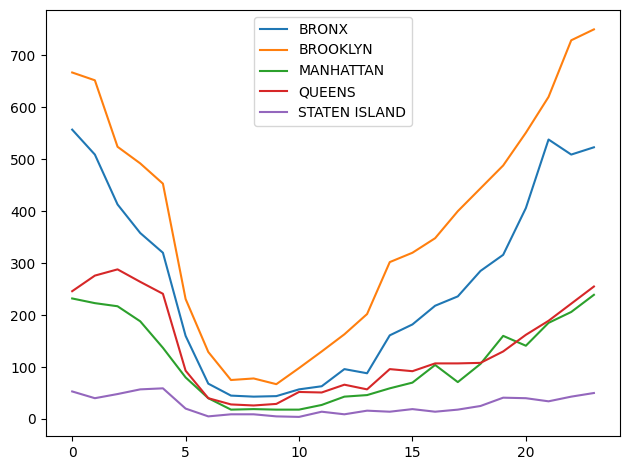

In [139]:
# Sensejaus sprendimas: 

nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])
nypd['H'] = nypd['OCCUR_TIME'].dt.hour                                          #Pasiima stulpeli "Occur time" , pasirenkam ta dt finkciju rinkini ir pasirenk hour.Ir prisidedam H stulpeli.
nypd = nypd[['BORO', 'PERP_RACE','VIC_RACE','H']]                                #

nypdgr = nypd.groupby('BORO')                   #sugrupuojam pagal stulpeli BOro

fig, axis = plt.subplots()                #fig yra langas , o axis pats grafikas
#plotting code:
for group in nypdgr.groups.keys():
    h = nypdgr.get_group(group)['H'].value_counts().sort_index()               #get_groups Jei bus Bronx . Value xounts suskaiciuoja ir padaro du stulperlius value ir index. 
    axis.plot(h.index, h.values, label=group)

axis.legend(loc='best')                        #privalo buti , 
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

C:\Users\ITWORK\AppData\Local\Temp\ipykernel_12436\156747035.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])


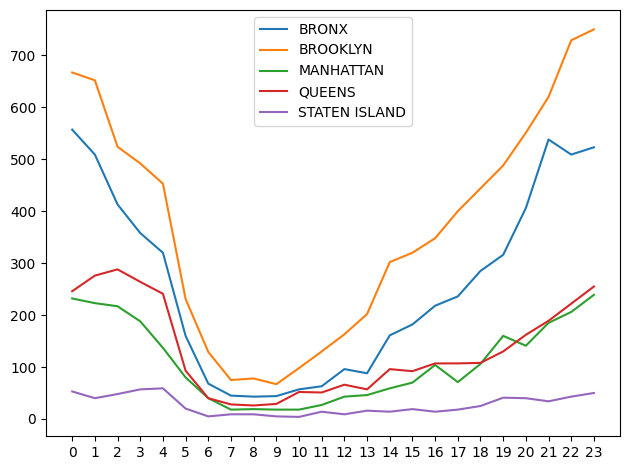

In [10]:
# Sensejaus sprendimas: 

nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])
nypd['H'] = nypd['OCCUR_TIME'].dt.hour                                          #Pasiima stulpeli "Occur time" , pasirenkam ta dt finkciju rinkini ir pasirenk hour.Ir prisidedam H stulpeli.
nypd = nypd[['BORO', 'PERP_RACE','VIC_RACE','H']]                                #

nypdgr = nypd.groupby('BORO')                   #sugrupuojam pagal stulpeli BOro

fig, axis = plt.subplots()                #fig yra langas , o axis pats grafikas
#plotting code:
for group in nypdgr.groups.keys():
    h = nypdgr.get_group(group)['H'].value_counts().sort_index()               #get_groups Jei bus Bronx . Value xounts suskaiciuoja ir padaro du stulperlius value ir index. 
    axis.plot(h.index, h.values, label=group)

axis.set_xticks(h.index)                 #idedam ,kad butu kas valanda

axis.legend(loc='best')                        #privalo buti , 
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
#Rytoj prisiminsime ,kartosime merch . Tada prisiminsime grupavima , dar nagrinesime integruota plot metoda. 

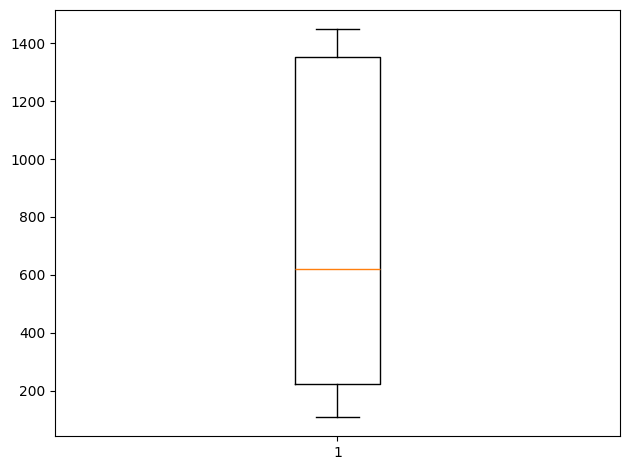

In [23]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b


# :sfig

fig, axis = plt.subplots()
#plotting code:
axis.boxplot(a)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

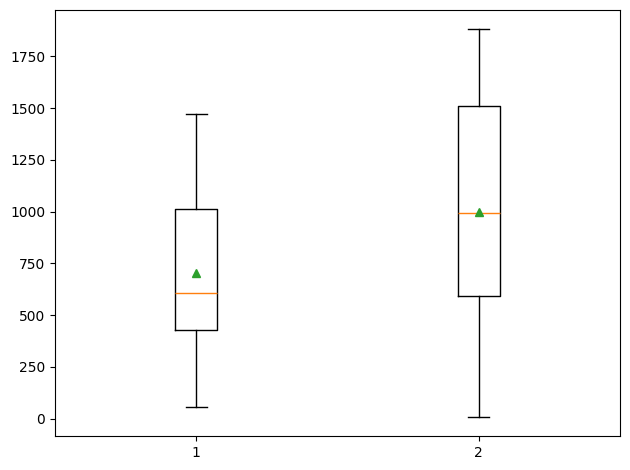

In [32]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b


# :sfig

fig, axis = plt.subplots()
#plotting code:
axis.boxplot(a, showmeans=True)
axis.boxplot(c, showmeans=True , positions=[2])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

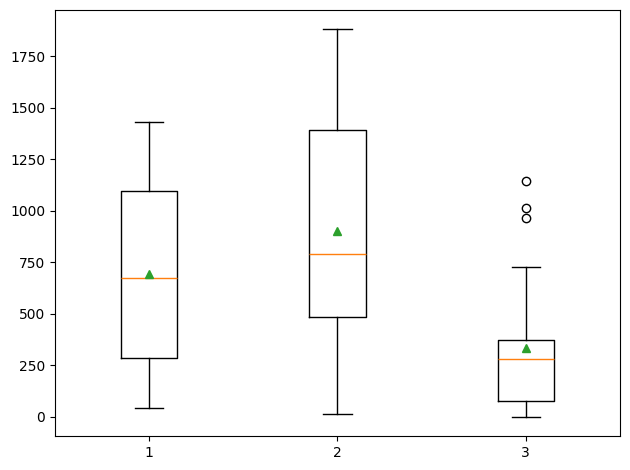

In [36]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

data = [a,c,d]
# :sfig

fig, axis = plt.subplots()
#plotting code:
axis.boxplot(data, showmeans=True)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()
#oranzine mediana .zalias trikampis 50procentutasku)

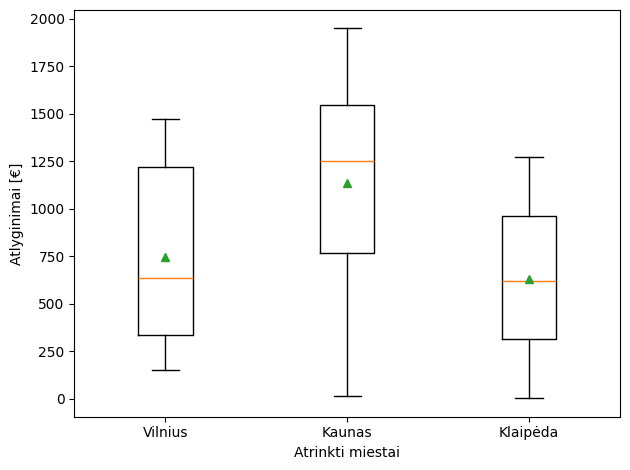

In [40]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

data = [a,c,d]
# :sfig

fig, axis = plt.subplots()
#plotting code:
axis.boxplot(data, showmeans=True)


axis.set_ylabel("Atlyginimai [€]")
axis.set_xlabel("Atrinkti miestai")

axis.set_xticklabels(['Vilnius', 'Kaunas', 'Klaipėda'])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()
#oranzine mediana .zalias trikampis 50procentutasku)

In [86]:
# Nuskaitykite life-exp.csv;
# gov-forms.csv
lifeExp = pd.read_csv('life-exp.csv')
Gov = pd.read_csv('gov-forms.csv')
lifeExp_GOV =  pd.merge(left=lifeExp, right=Gov , left_on='Entity' , right_on = "Name" , how ='inner')
lifeExp_GOV.head(3)

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,AFG,1955,29.854,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,ALB,1955,57.007,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,DZA,1955,43.916,Algeria,Republic,Executive,Presidency independent of legislature; ministr...


In [63]:
# ir sujunkite šias dvi lenteles į vieną naują lentelę.
# lifeExp_GOV.columns  isvardina visus stulpelius esancius 

lifeExp_GOV[["Constitutional form" ,'Life expectancy']].groupby(by="Constitutional form").mean(numeric_only=True).reset_index()

,Constitutional form,Life expectancy
0,Absolute monarchy,72.262000
1,Constitutionalmonarchy,77.183368
2,Provisional,64.171333
3,Republic,71.958209


In [67]:
# su query
lifeExp_GOV.query('Year >2018')[["Constitutional form" ,'Life expectancy']].groupby(by="Constitutional form").mean(numeric_only=True).reset_index()

,Constitutional form,Life expectancy
0,Absolute monarchy,72.262000
1,Constitutionalmonarchy,77.183368
2,Provisional,64.171333
3,Republic,71.958209


In [83]:
# Suraskite 3kias valstybes, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė.
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head

lifeExp_GOV.query('Year == 2019')
lifeExp_GOV

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
11648,Afghanistan,AFG,2019,64.833,Afghanistan,Republic,Executive,Presidency is independent of legislature
11649,Albania,ALB,2019,78.573,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
11650,Algeria,DZA,2019,76.880,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
11651,Andorra,AND,2019,83.732,Andorra,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
11652,Angola,AGO,2019,61.147,Angola,Republic,Executive,Presidency is independent of legislature
...,...,...,...,...,...,...,...,...
11825,Venezuela,VEN,2019,72.064,Venezuela,Republic,Executive,Presidency is independent of legislature
11826,Vietnam,VNM,2019,75.400,Vietnam,Republic,Executive,Power constitutionally linked to a single poli...
11827,Yemen,YEM,2019,66.125,Yemen,Provisional,NONE,No constitutionally-defined basis to current r...
11828,Zambia,ZMB,2019,63.886,Zambia,Republic,Executive,Presidency is independent of legislature


In [122]:
# Suraskite 3kias valstybes, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė.
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head
life2019short = lifeExp_GOV.query('Year == 2019')[["Entity" , 'Life expectancy']].sort_values(by='Life expectancy')
life2019short.head(3)

,Entity,Life expectancy
11679,Central African Republic,53.283
11680,Chad,54.239
11735,Lesotho,54.331


In [130]:
life2019long = lifeExp_GOV.query('Year == 2019')[["Entity" , 'Life expectancy']].sort_values(by='Life expectancy')
life2019long.tail(10)

,Entity,Life expectancy
11716,Iceland,82.993
11656,Australia,83.436
11723,Italy,83.512
11800,Spain,83.565
11793,Singapore,83.620
11651,Andorra,83.732
11805,Switzerland,83.779
11725,Japan,84.629
11787,San Marino,84.972
11752,Monaco,86.751


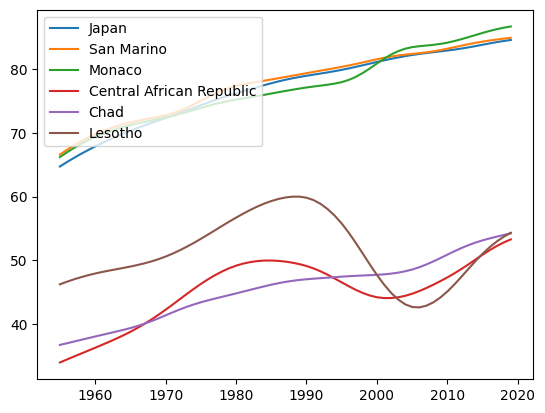

In [131]:
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo
# trukmės duomenis



lifeGOVJapan = lifeExp_GOV.query('Entity == "Japan"')[["Year" , 'Life expectancy']].sort_values(by='Year')

fig, axis = plt.subplots()

for country in life2019long.tail(3)["Entity"]:
    atr_salys = lifeExp_GOV.query('Entity == @country')[["Year" , 'Life expectancy']].sort_values(by='Year')
    axis.plot(atr_salys["Year"],  atr_salys['Life expectancy'], label=country)

for country in life2019short.head(3)["Entity"]:
    atr_salys = lifeExp_GOV.query('Entity == @country')[["Year" , 'Life expectancy']].sort_values(by='Year')
    axis.plot(atr_salys["Year"],  atr_salys['Life expectancy'], label=country)


axis.legend(loc="upper left")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
autoSmaller

,rida,gamintojas,price,pagaminimo_data
0,253 000 km,BMW,19 500,2005-12
1,195 405 km,Mitsubishi,2 700,2006
2,129 800 km,Seat,13 490,2019-11
3,183 000 km,Skoda,14 650,2015-06
4,127 896 km,Volvo,38 000,2018-08
...,...,...,...,...
2395,157 000 km,Volvo,2 250,2006-06
2396,276 413 km,Opel,2 250,2006-10
2397,282 000 km,Volkswagen,2 250,2007-06
2398,260 000 km,Audi,2 250,2006-10


In [47]:
# Nuskaitykite auto.csv failą.
# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių vidutinė kaina yra didžiausia.



auto= pd.read_csv('auto.csv', sep= "|")
auto.head()

autoSmaller = auto [["rida" , "gamintojas" , "price" , "pagaminimo_data"]]    #susikuriam mazesne lentele

def Floatinisreikalas_kainai(konvertuojam):
    konvertacijakainos = float(konvertuojam.replace(" ",""))
    return konvertacijakainos
autoSmaller['KainaS'] = autoSmaller["price"].apply(Floatinisreikalas_kainai)  


gamintojoVidKaina = autoSmaller.groupby(by="gamintojas")["KainaS"].mean().sort_values()
print("Pigiausi:", gamintojoVidKaina.head() , "Brangiausi:" ,gamintojoVidKaina.tail())

# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis amžius yra didžiausias.
def Floatinisreikalas_datai(konvertuojam):
    konvertacijadatos= 2024-float(konvertuojam[:4]) 
    return konvertacijadatos
autoSmaller['Teisinga_Pagaminimo_data'] = autoSmaller["pagaminimo_data"].apply(Floatinisreikalas_datai)  
autoSmaller.head()

gamintojoVIdamzius = autoSmaller.groupby(by="gamintojas")['Teisinga_Pagaminimo_data'].mean().sort_values()
gamintojoVIdamzius.tail()


Pigiausi: gamintojas
Isuzu      850.0
Lada      1350.0
Smart     1649.0
Suzuki    1820.0
UAZ       1850.0
Name: KainaS, dtype: float64 Brangiausi: gamintojas
Maserati         34950.000000
Land Rover       40925.000000
Tesla            45666.666667
Porsche          61999.900000
Aston Martin    125000.000000
Name: KainaS, dtype: float64


C:\Users\ITWORK\AppData\Local\Temp\ipykernel_1488\4168950060.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autoSmaller['KainaS'] = autoSmaller["price"].apply(Floatinisreikalas_kainai)
C:\Users\ITWORK\AppData\Local\Temp\ipykernel_1488\4168950060.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autoSmaller['Teisinga_Pagaminimo_data'] = autoSmaller["pagaminimo_data"].apply(Floatinisreikalas_datai)


gamintojas
UAZ        35.00
Pontiac    41.50
Lada       42.50
Lincoln    55.00
GAZ        58.25
Name: Teisinga_Pagaminimo_data, dtype: float64

In [ ]:
Reikalingas teisigas groupby panaudojimas

In [56]:
d18s.head()

,lytis,amzius,issilavinimas,bdu_spalio,profesija
0,F,40-49,G2,460,334
1,M,50-59,G2,1487,722
2,M,40-49,G2,1500,721
3,M,50-59,G2,1500,722
4,F,40-49,G2,400,522


In [74]:
# nuskaitykite dus2014 ir dus2018 failus. 
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.



dus14 = pd.read_csv("DUS2014.csv")
dus18 = pd.read_csv("DUS2018.csv")
dus14.head()



d14s = dus14 [["lytis" , "amzius" , "issilavinimas" , "bdu_spalio" , "profesija"]] #susikuriam mazesne lentele
d18s = dus18 [["lytis" , "amzius" , "issilavinimas" , "bdu_spalio" , "profesija"]] #susikuriam mazesne lentele.head(5)
d18s.head()

AtlyginimasPagalIssilavinima14 = d14s.groupby(by="issilavinimas")["bdu_spalio"].mean().sort_values()/3.4528
AtlyginimasPagalIssilavinima18 = d18s.groupby(by="issilavinimas")["bdu_spalio"].mean().sort_values()
print("2014 metu atlyginimai eurais pagal issilavinima:", AtlyginimasPagalIssilavinima14,  "2018 metu atlyginimai pagal issilavinima:" ,AtlyginimasPagalIssilavinima18.head())

Lentele2014 = AtlyginimasPagalIssilavinima14.reset_index()
Lentele2018 = AtlyginimasPagalIssilavinima18.reset_index()
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,

d14ird18 = pd.merge(left=Lentele2014, right=Lentele2018 ,left_on='issilavinimas' , right_on = "issilavinimas" , how ='inner')
d14ird18.head(10)


# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2014 ir 2018 metų, procentais.
d14ird18["Skurtumas"] = ((d14ird18["bdu_spalio_y"] - d14ird18["bdu_spalio_x"])/d14ird18["bdu_spalio_x"]) *100
d14ird18




2014 metu atlyginimai eurais pagal issilavinima: issilavinimas
G1     474.744650
G2     543.892581
G3     730.410678
G4    1011.965397
Name: bdu_spalio, dtype: float64 2018 metu atlyginimai pagal issilavinima: issilavinimas
G1     626.391679
G2     732.687157
G3    1094.764026
G4    1246.451196
Name: bdu_spalio, dtype: float64


,issilavinimas,bdu_spalio_x,bdu_spalio_y,Skurtumas
0,G1,474.744650,626.391679,31.942862
1,G2,543.892581,732.687157,34.711739
2,G3,730.410678,1094.764026,49.883354
3,G4,1011.965397,1246.451196,23.171326


In [81]:
# #suraskite pokytį tarp vidutinių atlyginimų  2014 ir 2018 metams, procentais, atsižvelgdami į amžiaus grupes

vidutinisAtlyginimas2014 = d14s.groupby(by="amzius")["bdu_spalio"].mean()/3.4528
vidutinisAtlyginimas2018= d18s.groupby(by="amzius")["bdu_spalio"].mean()

d14ird18 = pd.merge(left=vidutinisAtlyginimas2014, right=vidutinisAtlyginimas2018 ,left_on='amzius' , right_on = "amzius" , how ='inner')

#funkcija parasyt ir tada apply metoda


d14ird18["Skirtumais procentais"] = ((d14ird18["bdu_spalio_y"] - d14ird18["bdu_spalio_x"])/d14ird18["bdu_spalio_x"]) *100








,bdu_spalio_x,bdu_spalio_y
amzius,,
30-39,795.907989,1088.955721
40-49,700.619410,980.855429
50-59,666.763134,856.067124
60+,626.854754,784.542386
